In [1]:
# import necessary libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# importing sys
import sys

In [2]:
# reading spotify file
data_file = "Spotify-2000.csv"
df_spotify = pd.read_csv(data_file)
df_spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [4]:
df_spotify.rename(columns=lambda x: x.strip().replace(" ", "_").replace('(', '').replace(')', '').lower(), inplace=True)

In [5]:
df_spotify.top_genre.value_counts().head(10)

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: top_genre, dtype: int64

In [6]:
df_spotify.top_genre = df_spotify.top_genre.str.split().str[-1]

In [7]:
df_spotify.length_duration = df_spotify.length_duration.str.replace(',', '').astype(int)

In [8]:
df_spotify.top_genre.value_counts().head(10)

rock         856
pop          333
standards    123
metal         93
indie         77
cabaret       51
soul          45
wave          38
invasion      36
hop           29
Name: top_genre, dtype: int64

In [9]:
df_spotify_clean = df_spotify[df_spotify.top_genre.isin(['rock','pop','standards','metal','indie','cabaret'])]

In [10]:
df_spotify_clean.drop(columns = ['index','title', 'artist', 'year'], inplace = True)

<ipython-input-10-40df79aff285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify_clean.drop(columns = ['index','title', 'artist', 'year'], inplace = True)


In [11]:
df_spotify_clean.head()

,top_genre,beats_per_minute_bpm,energy,danceability,loudness_db,liveness,valence,length_duration,acousticness,speechiness,popularity
0,standards,157,30,53,-14,11,68,201,94,3,71
1,rock,135,79,50,-11,17,81,207,17,7,39
3,metal,173,96,43,-4,3,37,269,0,4,76
4,rock,106,82,58,-5,10,87,256,1,3,59
5,rock,99,46,54,-9,14,14,247,0,2,45


<ipython-input-12-0b68d31fb973>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_spotify_clean.corr(), annot=True, cmap='RdYlGn')


<Axes: >

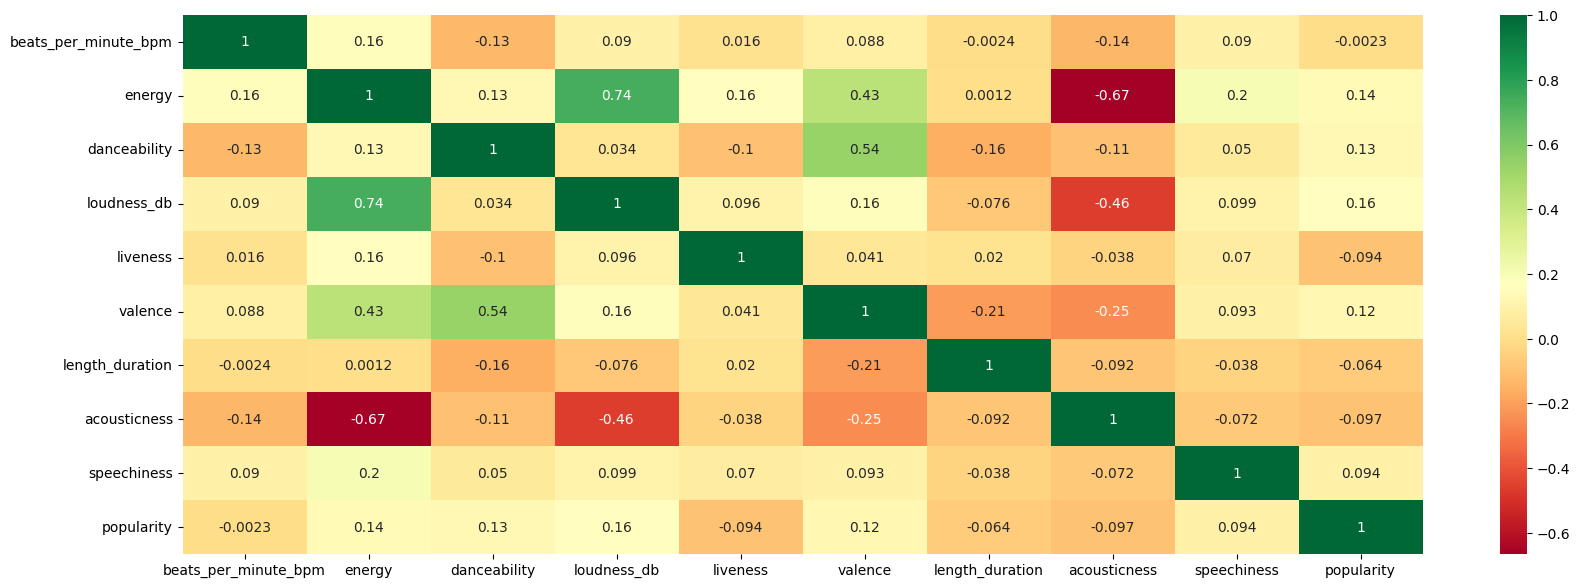

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(df_spotify_clean.corr(), annot=True, cmap='RdYlGn')

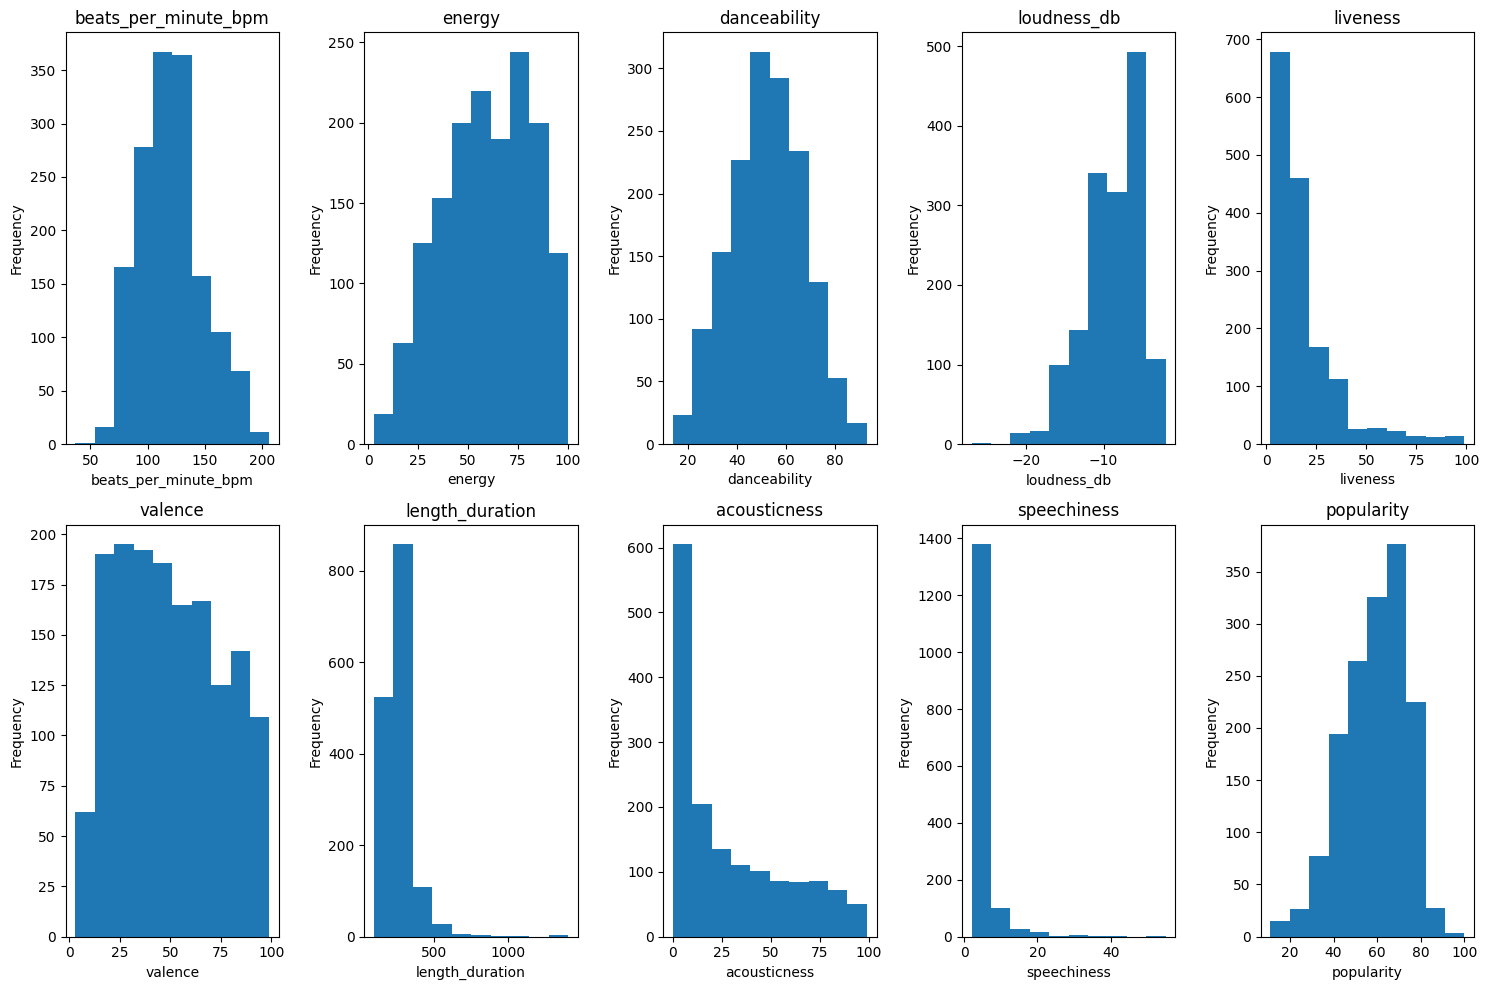

In [13]:
columns_to_plot = df_spotify_clean.columns[1:]

num_plots = len(columns_to_plot)
num_rows = 2
num_cols = (num_plots + 1) // num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    df_spotify_clean[column].plot(kind='hist', ax=axes[i], title=column)
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [14]:
train, test = train_test_split(df_spotify_clean, test_size = 0.2, random_state = 1)
# training set
x_train = train.values[:,1:]
y_train = train.values[:,0]

# test set
x_test = test.values[:,1:]
y_test = test.values[:,0]

In [15]:
standard_scaler = StandardScaler().fit(x_train)

# Standard Scaler
x_train_SS = standard_scaler.transform(x_train)
x_test_SS = standard_scaler.transform(x_test)

Baseline

In [16]:
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(len(y_test), sum(1 if i == 'rock' else 0 for i in y_test),
                                                     1.0*sum(1 if i == 'rock' else 0 for i in y_test)/len(y_test)))

total: 307  correct: 179  accuracy: 0.58


Logistic Regression

In [17]:
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(x_train_SS, y_train)

LogisticRegression()

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Predict probabilities
probs_y=classifier.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

In [19]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.40716612377850164
Recall: 0.40716612377850164
Precision: 0.32617742470344246
[[  0   0   1   0   6   0]
 [  0   0   1   0  16   0]
 [  0   0  17   0   2   0]
 [  0   0  17   0  49   0]
 [  0   0  71   0 108   0]
 [  0   0   1   0  18   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nearest Neighbour

In [20]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

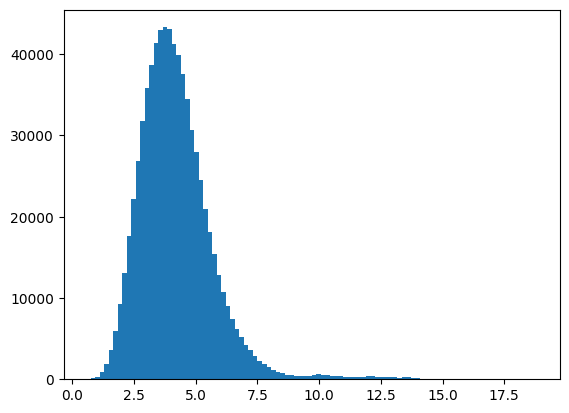

In [21]:
dists = []
for i in range(len(x_train_SS) - 1):
    for j in range(i + 1, len(x_train_SS)):
        dist = EuclideanDistance(x_train_SS[i], x_train_SS[j])
        dists.append(dist)

fig = plt.hist(dists, 100)

In [22]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric

    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels

    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results

    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

In [23]:
clf = NearestNeighbors()
clf.fit(x_train_SS, y_train)
preds = clf.predict(x_test_SS)

correct, total = 0, 0
for pred, label in zip(preds, y_test):
    if pred == label: correct += 1
    total += 1
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total: 307  correct: 154  accuracy: 0.50


In [24]:
# Calculate metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
conf_matrix = confusion_matrix(y_test, preds)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.501628664495114
Recall: 0.501628664495114
Precision: 0.509918660893787
[[  0   0   0   0   7   0]
 [  0   5   0   3   8   1]
 [  0   0   6   3   9   1]
 [  3   3   4  23  31   2]
 [  9   4  15  26 115  10]
 [  0   0   0   3  11   5]]


Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

unique = np.unique(y_train)

y_test_1hot = label_binarize(y_test, classes = unique)
y_train_1hot = label_binarize(y_train, classes = unique)

# labelling
y_test_label = LabelEncoder()

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

RF_cross_val_score = cross_val_score(rand_forest, x_train_SS, y_train_1hot, cv = 10, scoring = 'accuracy')
y_pred = cross_val_predict(rand_forest, x_test_SS, y_test_1hot, cv=10)
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.401339 (0.047830)


In [28]:
# Calculate metrics
accuracy = accuracy_score(y_test_1hot, y_pred)
precision = precision_score(y_test_1hot, y_pred, average='weighted')
recall = recall_score(y_test_1hot, y_pred, average='weighted')
#conf_matrix = confusion_matrix(y_test_1hot, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.42996742671009774
Recall: 0.42996742671009774
Precision: 0.5314931103574106
[[  0   0   0   0   7   0]
 [  0   5   0   3   8   1]
 [  0   0   6   3   9   1]
 [  3   3   4  23  31   2]
 [  9   4  15  26 115  10]
 [  0   0   0   3  11   5]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Net

In [29]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
nn.fit(x_train_SS, y_train)
preds = nn.predict(x_test_SS)
print('Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy: 0.45603 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote,y_smote = oversample.fit_resample(x_train_SS,y_train)

unique = np.unique(y_smote)

y_smote_1hot = label_binarize(y_smote, classes = unique)

# labelling
y_smote_label = LabelEncoder()

In [31]:
RF_cross_val_score = cross_val_score(rand_forest, x_smote, y_smote_1hot, cv = 10, scoring = 'accuracy')
y_pred = cross_val_predict(rand_forest, x_smote, y_smote_1hot, cv=10)
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.671714 (0.181237)


In [32]:
# Calculate metrics
accuracy = accuracy_score(y_smote_1hot, y_pred)
precision = precision_score(y_smote_1hot, y_pred, average='weighted')
recall = recall_score(y_smote_1hot, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.6701132447070408
Recall: 0.6701132447070408
Precision: 0.9247608332545592
[[  0   0   0   0   7   0]
 [  0   5   0   3   8   1]
 [  0   0   6   3   9   1]
 [  3   3   4  23  31   2]
 [  9   4  15  26 115  10]
 [  0   0   0   3  11   5]]


In [33]:
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(x_smote,y_smote)

LogisticRegression()

In [34]:
# Predicting the Test set results
y_pred_smote = classifier.predict(x_test)
# Predict probabilities
probs_y_smote =classifier.predict_proba(x_test)
probs_y_smote = np.round(probs_y_smote, 2)

In [35]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote, average='weighted')
recall = recall_score(y_test, y_pred_smote, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_smote)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.44299674267100975
Recall: 0.44299674267100975
Precision: 0.34351350926057056
[[  0   0   1   0   6   0]
 [  0   0   1   0  16   0]
 [  0   0  18   0   1   0]
 [  0   0  18   0  48   0]
 [  0   0  61   0 118   0]
 [  0   0   1   0  18   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
clf = NearestNeighbors()
clf.fit(x_smote,y_smote)
preds = clf.predict(x_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
conf_matrix = confusion_matrix(y_test, preds)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.5830618892508144
Recall: 0.5830618892508144
Precision: 0.33996116669672893
[[  0   0   0   0   7   0]
 [  0   0   0   0  17   0]
 [  0   0   0   0  19   0]
 [  0   0   0   0  66   0]
 [  0   0   0   0 179   0]
 [  0   0   0   0  19   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
nn.fit(x_smote,y_smote)
preds = nn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')
conf_matrix = confusion_matrix(y_test, preds)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.5830618892508144
Recall: 0.5830618892508144
Precision: 0.33996116669672893
[[  0   0   0   0   7   0]
 [  0   0   0   0  17   0]
 [  0   0   0   0  19   0]
 [  0   0   0   0  66   0]
 [  0   0   0   0 179   0]
 [  0   0   0   0  19   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

train, test = train_test_split(df_spotify_clean, test_size=0.2, random_state=1)

x_train = train.values[:, 1:]
y_train = train['top_genre']

x_test = test.values[:, 1:]
y_test = test['top_genre']

standard_scaler = StandardScaler().fit(x_train)
x_train_SS = standard_scaler.transform(x_train)
x_test_SS = standard_scaler.transform(x_test)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
x_train_SS = x_train_SS.reshape(x_train_SS.shape[0], x_train_SS.shape[1], 1)
x_test_SS = x_test_SS.reshape(x_test_SS.shape[0], x_test_SS.shape[1], 1)

x_train_2D = x_train_SS.reshape(x_train_SS.shape[0], -1)

smote = SMOTE(sampling_strategy='auto', random_state=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_2D, y_train_encoded)

x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], x_train_SS.shape[1], 1)

model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train_SS.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with the number of classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_resampled, y_train_resampled, epochs=10, validation_data=(x_test_SS, y_test_encoded))

test_loss, test_accuracy = model.evaluate(x_test_SS, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
127/127 [==============================] - 4s 16ms/step - loss: 1.4994 - accuracy: 0.4338 - val_loss: 1.5058 - val_accuracy: 0.3550
Epoch 2/10
127/127 [==============================] - 1s 7ms/step - loss: 1.1760 - accuracy: 0.5615 - val_loss: 1.4411 - val_accuracy: 0.3746
Epoch 3/10
127/127 [==============================] - 1s 8ms/step - loss: 1.0807 - accuracy: 0.5881 - val_loss: 1.4625 - val_accuracy: 0.4039
Epoch 4/10
127/127 [==============================] - 1s 9ms/step - loss: 1.0271 - accuracy: 0.6160 - val_loss: 1.4232 - val_accuracy: 0.4039
Epoch 5/10
127/127 [==============================] - 1s 10ms/step - loss: 0.9860 - accuracy: 0.6342 - val_loss: 1.5198 - val_accuracy: 0.3648
Epoch 6/10
127/127 [==============================] - 1s 7ms/step - loss: 0.9410 - accuracy: 0.6494 - val_loss: 1.4690 - val_accuracy: 0.4007
Epoch 7/10
127/127 [==============================] - 1s 7ms/step - loss: 0.9049 - accuracy: 0.6679 - val_loss: 1.4219 - val_accuracy: 0.4137
Epoc

In [56]:
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train_SS.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train_resampled, y_train_resampled, epochs=10, validation_data=(x_test_SS, y_test_encoded))

test_loss, test_accuracy = model.evaluate(x_test_SS, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
127/127 [==============================] - 3s 7ms/step - loss: 1.2251 - accuracy: 0.5478 - val_loss: 1.5216 - val_accuracy: 0.2638
Epoch 2/10
127/127 [==============================] - 1s 5ms/step - loss: 0.9179 - accuracy: 0.6507 - val_loss: 1.3350 - val_accuracy: 0.4039
Epoch 3/10
127/127 [==============================] - 1s 5ms/step - loss: 0.8337 - accuracy: 0.6901 - val_loss: 1.4321 - val_accuracy: 0.4104
Epoch 4/10
127/127 [==============================] - 1s 5ms/step - loss: 0.7388 - accuracy: 0.7226 - val_loss: 1.7151 - val_accuracy: 0.3779
Epoch 5/10
127/127 [==============================] - 1s 4ms/step - loss: 0.7161 - accuracy: 0.7319 - val_loss: 1.4932 - val_accuracy: 0.4235
Epoch 6/10
127/127 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.7309 - val_loss: 1.5866 - val_accuracy: 0.4039
Epoch 7/10
127/127 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.7523 - val_loss: 1.5867 - val_accuracy: 0.4397
Epoch 